# Prototyping notebook
* Load jpg frames of RHEED movie
* Dimensionality reduction with PCA and NMF

TODO
* Dim red with UMAP + VAE 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import cv2
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import glob
from glob import iglob

from sklearn.decomposition import PCA, NMF

ModuleNotFoundError: No module named 'cv2'

In [3]:
%matplotlib inline

In [4]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('plasma')  # https://matplotlib.org/stable/tutorials/colors/colormaps.html

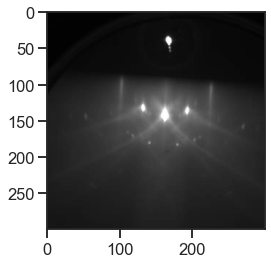

In [5]:
# check some images
filepath = 'data/c01_0001.jpg'
photo = cv2.imread(filepath)
photo1 = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)

# set crop params
x1, x2 = 0, 300
y1, y2 = 150, 450

crop_photo = photo1[x1:x2, y1:y2]
plt.imshow(crop_photo, cmap = "gray")

In [6]:
dims = crop_photo.shape
dims

(300, 300)

### Import pre-processed data...

In [8]:
data = np.load('data/pca.npz')
components = data['arr_0']

data = np.load('data/nmf.npz')
H = data['arr_0']
components.shape, H.shape

((3, 90000), (3, 90000))

In [25]:
components[2,:]

array([ 3.89025364e-15, -6.45819372e-17, -2.01987146e-18, ...,
        3.01879067e-04,  2.69148498e-04,  2.69148498e-04])

In [21]:
len(components)

3

### ...or import all frames and do processing

In [79]:
data_path = '/Users/nfrey/Documents/rheed/jpgs/*.jpg'  # point to your local folder
# data_path = 'data/*.jpg'

files = glob.glob(data_path,  
                   recursive = True) 
frames = pd.DataFrame([])

# flatten to vectors and store in dataframe
for file in files:
    img = cv2.imread(file)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    crop_img = img1[x1:x2, y1:y2]
    frame = pd.Series(crop_img.flatten(),name=file)
    frames = frames.append(frame)

frames = frames.sort_index()  # time ordered
frames.head()

,0,1,2,3,4,5,6,7,8,9,...,89990,89991,89992,89993,89994,89995,89996,89997,89998,89999
/Users/nfrey/Documents/rheed/jpgs/c01_0001.jpg,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0
/Users/nfrey/Documents/rheed/jpgs/c01_0002.jpg,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0
/Users/nfrey/Documents/rheed/jpgs/c01_0003.jpg,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0
/Users/nfrey/Documents/rheed/jpgs/c01_0004.jpg,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0
/Users/nfrey/Documents/rheed/jpgs/c01_0005.jpg,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0


In [80]:
frames.shape

(1002, 90000)

In [83]:
first = frames.iloc[0, ]
a = first.values.reshape(dims)
a.shape

(300, 300)

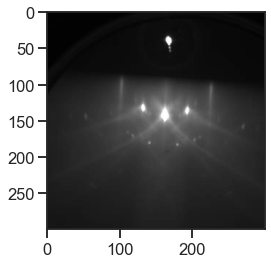

In [84]:
plt.imshow(a, cmap='gray')

In [87]:
frames1 = frames.iloc[0:,]  # take slice of frames if needed
frames1 = frames1.div(255)  # normalize
frames1.shape

(1002, 90000)

### Dimensionality reduction (PCA)

In [132]:
n_components = min(len(frames1), 3)

pca = PCA(n_components=n_components)
pcnew = pca.fit(frames1)
pc = pca.fit_transform(frames1)
columns = [f'PC{idx}' for idx in range(1, n_components+1)]
pc_df = pd.DataFrame(data = pc , 
        columns = columns)
pc_df.head()

,PC1,PC2,PC3
0,18.497882,9.080990,2.734563
1,18.380640,9.181942,2.778275
2,18.635586,9.077834,2.758800
3,18.416693,9.067613,2.770992
4,18.050684,9.144307,2.822253


In [133]:
pca.explained_variance_ratio_

array([0.87083563, 0.09916149, 0.01213934])

In [151]:
np.savez_compressed('data/pca.npz', pca.components_)

In [192]:
data = np.load('data/pca.npz')
components = data['arr_0']

In [135]:
pc_df.to_csv('data/pca.csv', index=None)

Text(0, 0.5, 'Fraction Variance Explained')

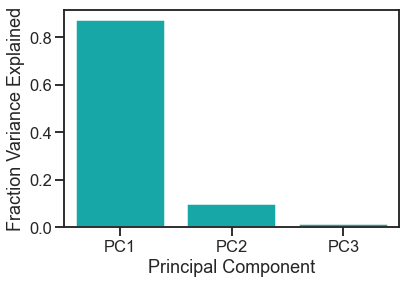

In [137]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':columns})

sns.barplot(x='PC',y="var", 
           data=df, color="c");
plt.xlabel('Principal Component')
plt.ylabel('Fraction Variance Explained')

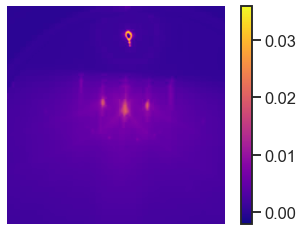

In [10]:
# plot first PC
# plt.imshow(pcnew.components_[0].reshape(dims), cmap = "plasma");
plt.imshow(components[0].reshape(dims), cmap = "plasma");
plt.colorbar();
plt.axis('off');

In [26]:
Time = np.linspace(0.0,1.0,len(pc_df))  # add time step info

pc_df['Time'] = Time
pc_df.head()

,PC1,PC2,PC3,Time
0,18.497882,9.080990,2.734563,0.000000
1,18.380640,9.181942,2.778275,0.000999
2,18.635586,9.077834,2.758800,0.001998
3,18.416693,9.067613,2.770992,0.002997
4,18.050684,9.144307,2.822253,0.003996


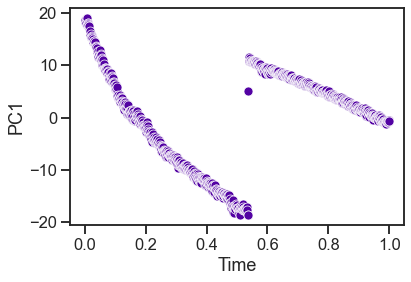

In [14]:
# PC1 correlates with intensity decay over time
sns.scatterplot(data=pc_df, x='Time', y='PC1');

In [27]:
grad = np.gradient(pc_df['PC1'], pc_df['Time'])

In [28]:
pc_df['dPC1_dt'] = grad

In [29]:
pc_df.to_csv('data/pca.csv', index=None)

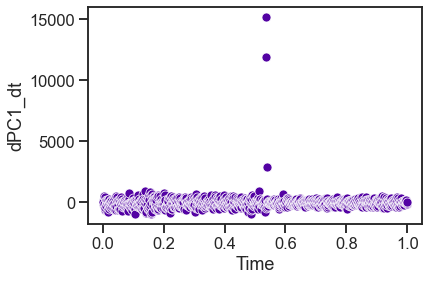

In [159]:
sns.scatterplot(data=pc_df, x='Time', y='dPC1_dt');

In [161]:
pc_df['Time'].iloc[pc_df['dPC1_dt'].argmax()]  # find intensity change in the images

0.5374625374625375

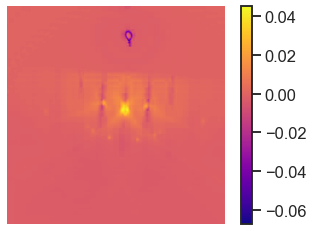

In [11]:
# plot second PC
plt.imshow(components[1].reshape(dims), cmap = "plasma");
plt.colorbar();
plt.axis('off');

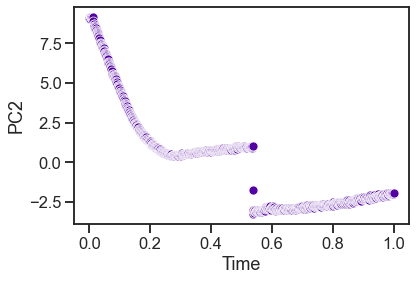

In [112]:
sns.scatterplot(data=pc_df, x='Time', y='PC2');

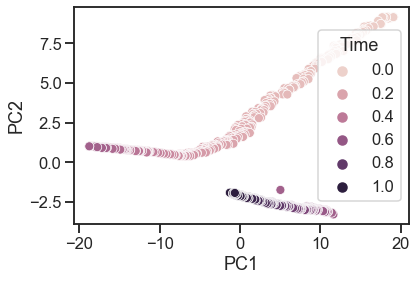

In [113]:
sns.scatterplot(x ='PC1', y = 'PC2', hue ='Time', data=pc_df);

### Dim reduction (non-negative matrix factorization)

In [114]:
model = NMF(n_components=3, init='random', random_state=0, max_iter = 100)
W = model.fit_transform(frames1)
H = model.components_
W.shape

/Users/nfrey/miniconda3/envs/rheed-viz/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  ConvergenceWarning,


(1002, 3)

In [140]:
np.savez_compressed('data/nmf.npz', H)

In [150]:
data = np.load('data/nmf.npz')
H = data['arr_0']

In [123]:
model.reconstruction_err_  # Frobenius norm of the matrix difference

48.74477122281719

In [124]:
df = pd.DataFrame(W, columns = ['Column_A', 'Column_B', 'Column_C'])
df['Time'] = Time
df.head()

,Column_A,Column_B,Column_C,Time
0,0.605323,0.030897,0.107240,0.000000
1,0.606159,0.025729,0.109173,0.000999
2,0.607316,0.033360,0.104086,0.001998
3,0.603934,0.030508,0.108344,0.002997
4,0.602407,0.025365,0.109006,0.003996


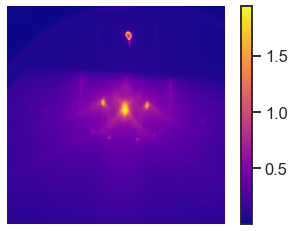

In [125]:
# plot first cluster
plt.imshow(H[0, :].reshape(dims), cmap = "plasma");
plt.colorbar();
plt.axis('off');

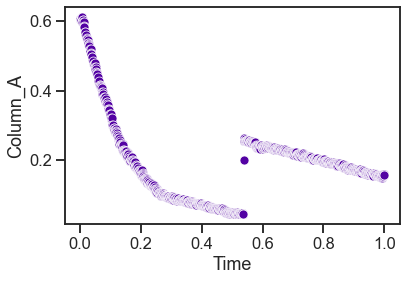

In [126]:
sns.scatterplot(data=df, x='Time', y='Column_A');

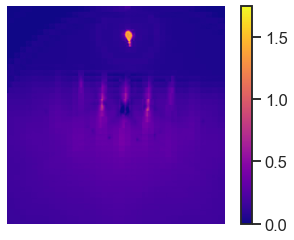

In [127]:
# plot second cluster
plt.imshow(H[1, :].reshape(dims), cmap = "plasma");
plt.colorbar();
plt.axis('off');

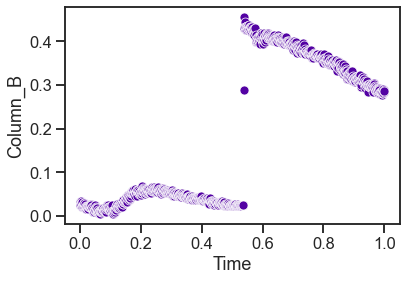

In [128]:
sns.scatterplot(data=df, x='Time', y='Column_B');

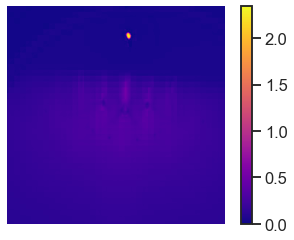

In [129]:
# plot third cluster
plt.imshow(H[2, :].reshape(dims), cmap = "plasma");
plt.colorbar();
plt.axis('off');

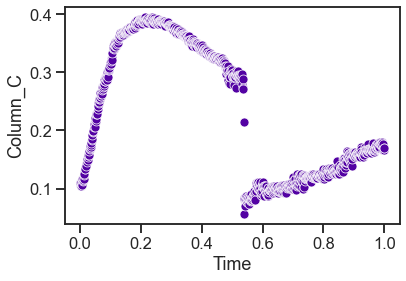

In [130]:
sns.scatterplot(data=df, x='Time', y='Column_C');

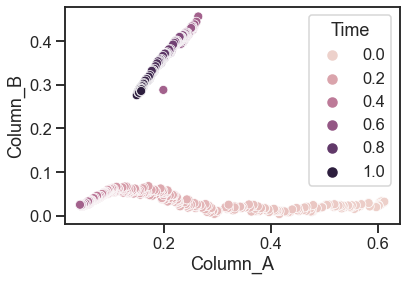

In [131]:
sns.scatterplot(x ='Column_A', y = 'Column_B', hue ='Time', data=df);

### Variational recurrent autoencoder (VRAE) clustering

In [169]:
from models.vae import VRAE
from models.utils import plot_clustering, open_data
import torch

import plotly
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split

In [179]:
hidden_size = 16
hidden_layer_depth = 2
latent_length = 20
batch_size = 32
learning_rate = 0.0005
n_epochs = 10
dropout_rate = 0.2
optimizer = 'Adam' # options: ADAM, SGD
cuda = False # options: True, False
print_every=30
clip = True # options: True, False
max_grad_norm=5
loss = 'MSELoss' # options: SmoothL1Loss, MSELoss
block = 'LSTM' # options: LSTM, GRU

In [177]:
dload = './models' #download directory

In [168]:
frames.shape

(1002, 90000)

In [170]:
frames_array = frames.to_numpy()

In [174]:
X_train, X_val = frames_array[0:800,], frames_array[800:,]

In [182]:
train_dataset = TensorDataset(torch.from_numpy(X_train))
val_dataset = TensorDataset(torch.from_numpy(X_val))

In [176]:
sequence_length = X_train.shape[0]
number_of_features = X_train.shape[1]

In [180]:
vrae = VRAE(sequence_length=sequence_length,
            number_of_features = number_of_features,
            hidden_size = hidden_size, 
            hidden_layer_depth = hidden_layer_depth,
            latent_length = latent_length,
            batch_size = batch_size,
            learning_rate = learning_rate,
            n_epochs = n_epochs,
            dropout_rate = dropout_rate,
            optimizer = optimizer, 
            cuda = cuda,
            print_every=print_every, 
            clip=clip, 
            max_grad_norm=max_grad_norm,
            loss = loss,
            block = block,
            dload = dload)

In [191]:
vrae.fit(train_dataset)

Epoch: 0


RuntimeError: number of dims don't match in permute